In [8]:
!{sys.executable} -m pip list | grep tensorflow

tensorflow           2.0.0b1             
tensorflow-estimator 1.14.0              


In [ ]:
import sys
!{sys.executable} -m pip install --upgrade tensorflow==2.0.0b1 --ignore-installed

In [1]:
import os

# Get all folder names
path = 'cybersec-imagery/cybersecurity'
folders = [os.path.join(path, o) for o in os.listdir(path) 
                    if os.path.isdir(os.path.join(path,o))]
folders.sort()

#Get all images names

images = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        images.append(os.path.join(r, file))

for img in images:
    if ".DS_Store" in img:
        images.remove(img)
    elif ".json" in img:
        images.remove(img)

In [2]:
images[:5]

['cybersec-imagery/cybersecurity/2018-01-14T01:00:22.154886/95_Cybersecurity101_Toolkit_1170x700.jpg',
 'cybersec-imagery/cybersecurity/2018-01-14T01:00:22.154886/96_cybersecurity-lock.jpeg',
 'cybersec-imagery/cybersecurity/2018-01-14T01:00:22.154886/55_cybersecurity_boards-100623183-large.jpg',
 'cybersec-imagery/cybersecurity/2018-01-14T01:00:22.154886/16_cyber-security-hgtc.png',
 'cybersec-imagery/cybersecurity/2018-01-14T01:00:22.154886/90_cybersecurity.jpg?1438115350']

In [3]:
import tensorflow.keras
import numpy as np
from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

In [30]:
from os import listdir
from os.path import isfile, join
square_images = [f for f in listdir("square-images") if isfile(join("square-images", f))]
length = len(square_images) - 1

In [49]:
length

9591

In [51]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def get_batch_image(i):
    filename = "square-images/" + str(i) + ".jpg"
    original = load_img(filename, target_size=(224,224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    return image_batch

image_labels = []

for i in range(length):
    image_batch = get_batch_image(i)
    processed_image = vgg16.preprocess_input(image_batch.copy())
    predictions = vgg_model.predict(processed_image)
    label = decode_predictions(predictions)
    image_labels.append(label[0][0])
    if i % 1000 == 0:
        print("Finished classifying {} images".format(i))

Finished classifying 0 images
Finished classifying 1000 images
Finished classifying 2000 images
Finished classifying 3000 images
Finished classifying 4000 images
Finished classifying 5000 images
Finished classifying 6000 images
Finished classifying 7000 images
Finished classifying 8000 images
Finished classifying 9000 images


In [3]:
import pickle

with open ('image_labels', 'rb') as fp:
    image_labels = pickle.load(fp);

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/Users/anna/anaconda3/envs/gluon/lib/python3.6/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

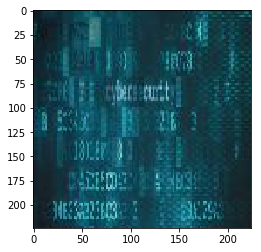

('n04152593', 'screen', 0.16725647)


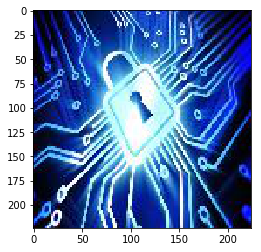

('n04275548', 'spider_web', 0.24146697)


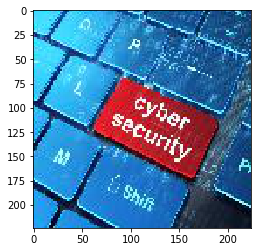

('n03598930', 'jigsaw_puzzle', 0.31595635)

In [104]:
# Demo 1
filename = "square-images/" + str(1) + ".jpg"
demo = load_img(filename, target_size=(224,224))
plt.imshow(demo)
plt.show()
print(image_labels[1])

# Demo 2
filename = "square-images/" + str(3) + ".jpg"
demo = load_img(filename, target_size=(224,224))
plt.imshow(demo)
plt.show()
print(image_labels[3])

# Demo 3
filename = "square-images/" + str(14) + ".jpg"
demo = load_img(filename, target_size=(224,224))
plt.imshow(demo)
plt.show()
image_labels[14]

The above results are the converted the result to human-readable labels. And they are sorted according to the confidence of prediction. The output shows the class ID, class name and the confidence of prediction.

In [66]:
print("Number of images: {}".format(len(image_labels)))
image_labels_unique = set(image_labels)
print("Number of unique images: {}".format(len(image_labels_unique)))
label_names = []
for l in image_labels:
    label_names.append(l[1])
label_classes = set(label_names)
print("Number of unique classes: {}".format(len(label_classes)))

Number of images: 9591
Number of unique images: 805
Number of unique classes: 140


In [81]:
from collections import Counter 
result = [item for items, c in Counter(label_names).most_common() 
                                      for item in [items] * c] 
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

print("Top 20 classes based on frequency: ")
f7(result)[:20]

Top 20 classes based on frequency: 


['oscilloscope',
 'window_screen',
 'stage',
 'fountain',
 'container_ship',
 'jigsaw_puzzle',
 'digital_clock',
 'computer_keyboard',
 'water_bottle',
 'maze',
 'space_shuttle',
 'analog_clock',
 'book_jacket',
 'oxygen_mask',
 'nipple',
 'freight_car',
 'castle',
 'whistle',
 'spider_web',
 'screen']

In [ ]:
generic abersterial network
generate & classify images
generator function